## 1. Load and Check Data

In [1]:
# Import packages: pandas and numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from three datasets: books, users, and ratings

books = pd.read_csv('BX-Books.csv', sep = ';', error_bad_lines = False, encoding = "latin-1")
users = pd.read_csv('BX-Users.csv', sep = ';', error_bad_lines = False, encoding = "latin-1")
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines = False, encoding = "latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\chand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [3]:
# Check shapes of three dataframes

print (books.shape)
print (users.shape)
print (ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [4]:
# Check headings: books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Check headings: users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Check headings: ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## 2. Data Preprocessing

### 2.1 Update Feature Names
We updated the feature names for all three dataframes ensure consistency and readability 

In [7]:
books.columns=['ISBN','BookTitle','BookAuthor','PublicationYear','Publisher','Imageurls','Imageurlms','Imageurll']
users.columns=['UserID','Location','Age']
ratings.columns=['UserID','ISBN','BookRating']

### 2.2 Drop Unnecessary Features 
We droped three features from books, as they are only image urls and irrelevant to the recommender model we want to build

In [8]:
books.drop(['Imageurls','Imageurlms','Imageurll'], axis = 1, inplace = True)

### 2.3 Missing Values and Errors
#### 2.3.1 Missing Values

In [9]:
print(books.isna().sum())
print('\n')
print(users.isna().sum())
print('\n')
print(ratings.isna().sum())

ISBN               0
BookTitle          0
BookAuthor         1
PublicationYear    0
Publisher          2
dtype: int64


UserID           0
Location         0
Age         110762
dtype: int64


UserID        0
ISBN          0
BookRating    0
dtype: int64


Three features have missing values: BookAuthor and Publisher in books dataset, and Age in users dataset. 

For BookAuthor and Publisher, we replaced missing values with other

In [10]:
books.Publisher.fillna("Other", inplace = True)
books.BookAuthor.fillna("Other", inplace = True)
print("BookAuthor feature now has {} missing values ".format(books.BookAuthor.isna().sum()))
print("Publisher feature now has {} missing values ".format(books.Publisher.isna().sum()))

BookAuthor feature now has 0 missing values 
Publisher feature now has 0 missing values 


For Age, we first examined extreme/unrealistic values, treated them as missing values. Then we replaced all missing values in Age with the median value.

In [11]:
print(np.sort(users['Age'].unique()))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 113. 114. 115. 116. 118. 119. 123. 124. 127. 128. 132. 133. 136. 137.
 138. 140. 141. 143. 146. 147. 148. 151. 152. 156. 157. 159. 162. 168.
 172. 175. 183. 186. 189. 199. 200. 201. 204. 207. 208. 209. 210. 212.
 219. 220. 223. 226. 228. 229. 230. 231. 237. 239. 244.  nan]


According to Wikipedia, the longest living person alive in the U.S. is at the age of 114. We treated all ages above 114 as error, and encode them as np.nan. We also treated ages under 6 as error, and encode them as np.nan too.

We replaced all missing values with median value.

In [12]:
users.loc[(users.Age < 6)|(users.Age > 114), 'Age'] = np.nan
users.Age.fillna(round(users.Age.median()),inplace = True)
print("Age feature now has {} missing values ".format(users.Age.isna().sum()))

Age feature now has 0 missing values 


#### 2.3.2 Extreme Values and Errors

In [13]:
books['PublicationYear'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In PulicationYear, the 'DK publishers' and 'Galimard' values are obviously errors. We wanted to first check observations with publication year of 'DK Publishing Inc' and 'Gallimard'

In [14]:
pd.set_option('display.max_colwidth', -1)
books[(books['PublicationYear'] == 'DK Publishing Inc') | (books['PublicationYear'] == 'Gallimard')]

,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


Only three observations found, from which we observed that their values for BookAuthor were wrongly stored under BookTitle, therefore values for all other values were stored one feature ahead. To solve this, we manually updated the values for these three observations

In [15]:
print(books[(books['PublicationYear'] == 'DK Publishing Inc') | (books['PublicationYear'] == 'Gallimard')].iloc[:, 1])

209538    DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"       
220731    Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"                                   
221678    DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
Name: BookTitle, dtype: object


In [16]:
books.loc[books['ISBN']=='078946697X','BookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[books['ISBN']=='078946697X','BookAuthor'] = 'Michael Teitelbaum'
books.loc[books['ISBN']=='078946697X','PublicationYear'] = 2000
books.loc[books['ISBN']=='078946697X','Publisher'] = 'DK Publishing Inc'

books.loc[books['ISBN']=='2070426769','BookTitle'] = 'Peuple du ciel, suivi de Les Bergers'
books.loc[books['ISBN']=='2070426769','BookAuthor'] = 'Jean-Marie Gustave Le Clézio'
books.loc[books['ISBN']=='2070426769','PublicationYear'] = 2003
books.loc[books['ISBN']=='2070426769','Publisher'] = 'Gallimard'

books.loc[books['ISBN']=='0789466953','BookTitle'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[books['ISBN']=='0789466953','BookAuthor'] = 'James Buckley'
books.loc[books['ISBN']=='0789466953','PublicationYear'] = 2000
books.loc[books['ISBN']=='0789466953','Publisher'] = 'DK Publishing Inc'

books[(books['ISBN'] == '078946697X') | (books['ISBN'] == '2070426769') | (books['ISBN'] == '0789466953')]

,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de Les Bergers",Jean-Marie Gustave Le Clézio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [17]:
# Examine PublicationYear for any unrealistic values
books['PublicationYear'] = books['PublicationYear'].astype(int)
np.sort(books['PublicationYear'].unique())

array([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908,
       1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021,
       2024, 2026, 2030, 2037, 2038, 2050], dtype=int64)

1. Because the book dataset is collected in 2004, any observation with PublicationYear over 2005 should be treated as error (giving one year buffer)
2. According to Wikipedia, the first book ever published was in 1455. Therefore, we treated PublicationYear value of 0, 1376, and 1378 as errors too
3. To deal with this, we first converted all erroneous values to np.NAN and then replaced them with median values of PublicationYear

In [18]:
books.loc[(books.PublicationYear > 2005)|(books.PublicationYear < 1379),'PublicationYear'] = np.NAN
books.PublicationYear.fillna(round(books.PublicationYear.median()),inplace = True)

#### 2.3.2 Merge Datasets

In [19]:
# Create user_rating dataset by merging ratings with users on 'UserID'
user_rating = pd.merge(ratings,users,on='UserID')

# Create rating_books dataset by merging user_ratings with books on 'ISBN'
ratings_books=pd.merge(user_rating,books, on='ISBN')

# Check ratings_books
ratings_books.head()

,UserID,ISBN,BookRating,Location,Age,BookTitle,BookAuthor,PublicationYear,Publisher
0,276725,034545104X,0,"tyler, texas, usa",32.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",32.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",32.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books


## 3. Exploratory Analysis

### 3.1. Barplot of Ratings

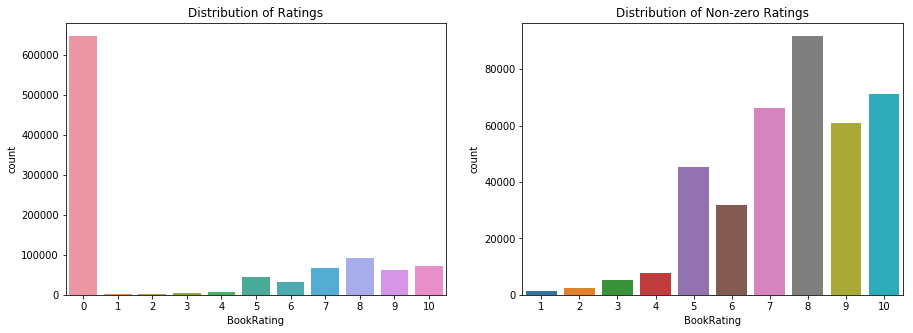

In [20]:
nonzeroratings = ratings_books[ratings_books.BookRating != 0]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(ratings_books['BookRating']).set_title('Distribution of Ratings')
plt.subplot(1, 2, 2)
sns.countplot(nonzeroratings['BookRating']).set_title('Distribution of Non-zero Ratings')
plt.show()

Findings:
1. There is high degree of sparsity in the dataset
2. The majority of the Ratings are 0 (implicit) and other ranges from 1-10 (explicit)
3. Among all non-zero ratings, most frequent rating is 8

### 3.2. Most Rated Books

In [21]:
RatingCount = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].count())
RatingCount.sort_values('BookRating',ascending = False).head()
most_rated_books=pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],
                              index=np.arange(5),columns=['ISBN'])
display('Top 5 Books with Most Ratings', 
        pd.merge(most_rated_books,books,on='ISBN'))

'Top 5 Books with Most Ratings'

,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher
0,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA


In [22]:
rating = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].mean())
rating.columns=['AverageRating']
rating['RatingCount']=ratings.groupby('ISBN')['BookRating'].count()
rating.describe()

,AverageRating,RatingCount
count,340556.000000,340556.000000
mean,2.943595,3.376185
std,3.345574,12.436252
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.800000,1.000000
75%,5.000000,2.000000
max,10.000000,2502.000000


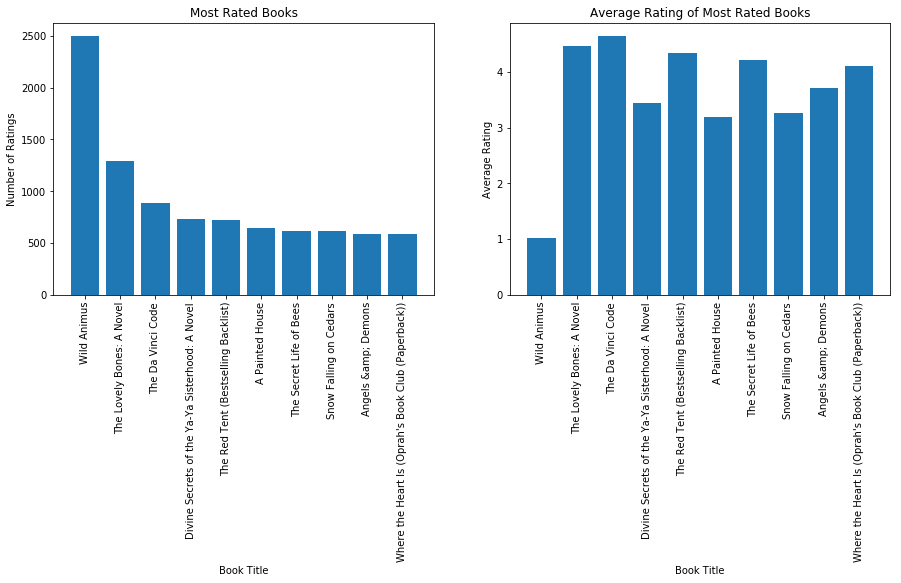

In [27]:
rating_table = pd.merge(ratings_books,rating,on='ISBN')
book_reviews= rating_table[['ISBN','BookTitle','AverageRating','RatingCount']]

#deleting the duplicate records
new_book_reviews=book_reviews.drop_duplicates()

#sorting by rating_count
sorted_by_ratingcount= new_book_reviews.sort_values('RatingCount',ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
x= sorted_by_ratingcount['BookTitle'].head(10)
y= sorted_by_ratingcount['RatingCount'].head(10)
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel("Book Title")
plt.ylabel("Number of Ratings")
plt.title('Most Rated Books')

plt.subplot(1, 2, 2)
x= sorted_by_ratingcount['BookTitle'].head(10)
y= sorted_by_ratingcount['AverageRating'].head(10)
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel("Book Title")
plt.ylabel("Average Rating")
plt.title('Average Rating of Most Rated Books')

plt.show()

Age-Group Distribution of the Dataset

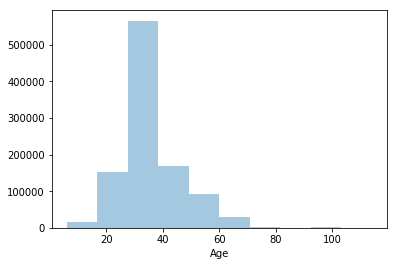

In [26]:
sns.distplot(ratings_books['Age'],kde=False,bins=10)
plt.show()

Findings
1. "Wild Animus" has the highest number of reviwes, but its average rating is very low
2. Books with more reviews may have low average rating
3. People in the age group 30-40 are the highest users who have rated the books. Bosst of the users who have rated the books are concentrated in the age group (20-60)

## 4. Build Recommender System Models

### 4.1 Pearson Correlation

In [24]:
counts=nonzeroratings['UserID'].value_counts()

Using the users data who have rated at least 100 books.

In [25]:
nonzeroratings=nonzeroratings[nonzeroratings['UserID'].isin(counts[counts>=100].index)]
counts1=nonzeroratings['BookRating'].value_counts()
nonzeroratings.head()

,UserID,ISBN,BookRating,Location,Age,BookTitle,BookAuthor,PublicationYear,Publisher
18,98391,034545104X,9,"morrow, georgia, usa",52.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
42,208406,034545104X,6,"kansas city, missouri, usa",30.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
50,240144,034545104X,3,"muskego, wisconsin, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
69,11676,0446520802,10,"n/a, n/a, n/a",32.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
74,23768,0446520802,6,"st. louis, missouri, usa",45.0,The Notebook,Nicholas Sparks,1996.0,Warner Books


Using books data that has atleast 100 ratings.

In [31]:
nonzeroratings=nonzeroratings[nonzeroratings['BookRating'].isin(counts1[counts1>=100].index)]
nonzeroratings

,UserID,ISBN,BookRating,Location,Age,BookTitle,BookAuthor,PublicationYear,Publisher
18,98391,034545104X,9,"morrow, georgia, usa",52.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
42,208406,034545104X,6,"kansas city, missouri, usa",30.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
50,240144,034545104X,3,"muskego, wisconsin, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
69,11676,0446520802,10,"n/a, n/a, n/a",32.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
74,23768,0446520802,6,"st. louis, missouri, usa",45.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
81,30711,0446520802,6,"sydney, new south wales, australia",32.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
124,158295,0446520802,8,"cleveland, ohio, usa",32.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
132,185233,0446520802,7,"winnemucca, nevada, usa",31.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
140,200226,0446520802,9,"burlington, ontario, canada",39.0,The Notebook,Nicholas Sparks,1996.0,Warner Books
145,208671,0446520802,9,"simi valley, california, usa",32.0,The Notebook,Nicholas Sparks,1996.0,Warner Books


Building a pivot table with userID as Index and ISBN's as columns and the bookratings as values to build a correlation matrix

In [32]:
ratings_crosstab=nonzeroratings.pivot(index='UserID',columns='ISBN',values='BookRating')
userID=ratings_crosstab.index
ISBN=ratings_crosstab.columns
ratings_crosstab.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
UserID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Using the most rated book from line 21 to find out the user ratings for the book

In [33]:
popular_rating=ratings_crosstab['0971880107']
popular_rating[popular_rating>=0]

UserID
11676     6.0 
11993     2.0 
28591     6.0 
31826     1.0 
37950     3.0 
38023     9.0 
46398     4.0 
55187     6.0 
56399     5.0 
65258     6.0 
88693     4.0 
93047     6.0 
94853     6.0 
114988    1.0 
129851    1.0 
132492    1.0 
136139    2.0 
138844    6.0 
168047    1.0 
187145    6.0 
187256    7.0 
224525    10.0
229329    2.0 
271448    2.0 
Name: 0971880107, dtype: float64

#EVALUATING SIMILARITY BASED ON CORRELATION


In [34]:
similar_to_popular = ratings_crosstab.corrwith(popular_rating)

corr_popular = pd.DataFrame(similar_to_popular, columns=['PearsonR'])
corr_popular.dropna(inplace=True)
corr_popular.head()

C:\Users\chand\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\chand\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,PearsonR
ISBN,
000648302X,-1.0
002036041X,1.0
0020811853,-1.0
0028604032,-1.0
0060012331,1.0


In [38]:
counts1['rating_count']=nonzeroratings['BookRating'].value_counts()
counts1.columns=['rating_counts']
counts1.head()
corr_popular_summary=corr_popular.join(counts1['rating_count'])
corr_popular_summary.head()

,PearsonR,BookRating
ISBN,,
000648302X,-1.0,NaN
002036041X,1.0,NaN
0020811853,-1.0,NaN
0028604032,-1.0,NaN
0060012331,1.0,NaN


In [39]:
corr_popular_summary.sort_values('PearsonR', ascending=False).head(10)

,PearsonR,BookRating
ISBN,,
0525945210,1.0,NaN
0385484518,1.0,NaN
0679444815,1.0,NaN
0380703882,1.0,NaN
055321313X,1.0,NaN
0553212621,1.0,NaN
0380731231,1.0,NaN
0140510168,1.0,NaN
0380800802,1.0,NaN


Finding the similar books based on Person correlation and finding the most similar books to the highly popular book

In [33]:
books_corr_popular = pd.DataFrame(['0525945210', '0385484518', '0679444815', '0380703882', '055321313X', '0553212621', '0380731231'], index = np.arange(7), columns=['ISBN'])
summary = pd.merge(books_corr_popular, books,on='ISBN')
summary

,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher
0,0525945210,A Man Named Dave: A Story of Triumph and Forgiveness,David J. Pelzer,1999.0,Dutton Books
1,0385484518,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",MITCH ALBOM,1997.0,Doubleday
2,0679444815,Timeline,Michael Crichton,1999.0,Alfred A. Knopf
3,0380703882,Communion : A True Story,Whitley Strieber,1988.0,Avon
4,055321313X,Anne of Green Gables (Anne of Green Gables Novels (Paperback)),L.M. MONTGOMERY,1982.0,Bantam Classics
5,0553212621,Lady Chatterley's Lover: Complete and Unexpurgated 1928 Orioli Edition,D. H. Lawrence,1983.0,Bantam
6,0380731231,Trojan Gold (Vicky Bliss Mysteries),Elizabeth Peters,2000.0,Avon


In [34]:
books[books['ISBN']=='0525945210']

,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher
5938,0525945210,A Man Named Dave: A Story of Triumph and Forgiveness,David J. Pelzer,1999.0,Dutton Books


In [47]:
ratings_crosstab1=nonzeroratings.pivot_table(index='UserID',columns='BookTitle',values='BookRating',fill_value=0)

userID=ratings_crosstab1.index
ISBN=ratings_crosstab1.columns

ratings_crosstab1.head()

BookTitle,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)",...,the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
UserID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2 Building User based recommendation system

In [48]:
# before building SVD Matrix factorization We need to de-mean.
mat = ratings_crosstab1.as_matrix()
mat_mean = np.mean(mat, axis = 1)
mat_demeaned = mat - mat_mean.reshape(-1, 1)
    

C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [50]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse.linalg import svds

In [51]:
#SVD Algorithm
U, sigma, Vt = svds(mat_demeaned, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + mat_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_crosstab1.columns).set_index([ratings_crosstab1.index])
preds_df.head()

BookTitle,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)",...,the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
UserID,,,,,,,,,,,,,,,,,,,,,
2033,0.007025,0.004628,-0.003758,0.042531,0.073430,-0.011169,0.003898,0.044319,0.011486,0.012334,...,0.015020,0.002116,-0.007078,-0.013599,-0.008830,0.000071,-0.016778,0.013998,0.000012,-0.013599
2110,0.016265,0.002313,0.014936,0.011392,0.031374,0.012906,0.016291,0.004848,-0.006617,0.021942,...,-0.012809,0.001099,-0.010288,0.005286,0.008950,0.014926,0.002844,-0.019275,0.016378,0.005286
2276,0.022005,0.006137,0.028547,-0.036951,0.020311,0.023327,0.021083,0.038415,-0.011623,0.031651,...,-0.021592,0.017833,-0.006930,0.013043,0.016878,0.026203,0.010487,-0.046635,0.024201,0.013043
4017,0.009531,0.000944,0.040031,-0.041588,0.219349,-0.002796,0.008302,0.080300,-0.023046,0.196378,...,-0.029673,-0.006026,0.022844,0.000634,0.000452,0.032469,0.000756,-0.171834,0.007278,0.000634
4385,0.052633,0.009375,0.060697,0.023378,0.015891,0.059733,0.059689,-0.005929,0.019450,0.020003,...,0.008498,-0.010337,0.210382,0.037458,0.045081,0.057041,0.032377,0.089306,0.056032,0.037458


Buiding a Function to predict the most similar books to user based on the user ratings. And recommending the 10 most similar books not rated by the user.

In [52]:
def recommend_books(predictions_df, userID, book_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.loc[userID].sort_values(ascending=False)
    
    # Get the user's data and merge in the book information.
    user_data = original_ratings_df[original_ratings_df['UserID'] == (userID)]
    user_full = (pd.merge(book_df,user_data,on='ISBN'))

    print('User {0} has already rated {1} books.'.format(userID, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings books not already rated.'.format(num_recommendations))
    
    df=pd.DataFrame(sorted_user_predictions)
    Recommendations=pd.merge(user_full,df,on='BookTitle')
    Final_Recom=Recommendations.sort_values('BookTitle',ascending=False).iloc[:num_recommendations, :-1]
    
    return user_full,Final_Recom

Randomly choosing UserId = 2033 for predicting the same.

In [53]:
already_rated,pred = recommend_books(preds_df, 2033, books,ratings , 10)
pred

User 2033 has already rated 190 books.
Recommending the highest 10 predicted ratings books not already rated.


,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher,UserID,BookRating
21,0449003787,"\O\"" Is for Outlaw""",SUE GRAFTON,2001.0,Ballantine Books,2033,0
89,0812533577,Wyrms,Orson Scott Card,1988.0,Tor Books,2033,9
121,0553379534,"Women's Bodies, Women's Wisdom: Creating Physical and Emotional Health and Healing",Christiane Northrup,1998.0,Bantam Books,2033,10
77,0886776120,"Winds of Fury (The Mage Winds, Book 3)",Mercedes Lackey,1994.0,Daw Books,2033,8
60,0886775167,"Winds of Fate (The Mage Winds, Book 1)",Mercedes Lackey,1997.0,Daw Books,2033,8
78,0886775639,"Winds of Change (The Mage Winds, Book 2)",Mercedes Lackey,1994.0,Daw Books,2033,8
125,0671025554,What's in a Name,Susan Osborn,1999.0,Pocket,2033,10
149,0385294638,Wanderlust,Danielle Steel,1986.0,Delacorte Press,2033,0
157,0142500135,Treasure at the Heart of the Tanglewood,Meredith Ann Pierce,2003.0,Puffin Books,2033,7
87,0312921098,Treason,Orson Scott Card,1990.0,St Martins Pr (Mm),2033,8


In [55]:
books[books['ISBN'].isin(list(already_rated['ISBN']))][['BookTitle','BookAuthor','Publisher']]

,BookTitle,BookAuthor,Publisher
1012,The Rainmaker,JOHN GRISHAM,Dell
1383,The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002),John Steinbeck,Penguin Books
1722,Something Under the Bed Is Drooling,Bill Watterson,Andrews McMeel Publishing
1932,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,Starscape Books
2366,Othello,William Shakespeare,Washington Square Press
2511,Principles of Instrumental Analysis,Douglas A. Skoog,Brooks Cole
2512,Chemistry,John McMurry,Prentice Hall
2513,Physical Chemistry,P. W. Atkins,W.H. Freeman &amp; Company
2514,Pooh (Giant Board Book),A. A. Milne,Dutton Books
2515,The Giving Tree,Shel Silverstein,HarperCollins


Predictions for the most similar books to the user ID 2033

In [42]:
pred[['BookTitle','BookAuthor','Publisher']]

,BookTitle,BookAuthor,Publisher
21,"\O\"" Is for Outlaw""",SUE GRAFTON,Ballantine Books
89,Wyrms,Orson Scott Card,Tor Books
121,"Women's Bodies, Women's Wisdom: Creating Physical and Emotional Health and Healing",Christiane Northrup,Bantam Books
77,"Winds of Fury (The Mage Winds, Book 3)",Mercedes Lackey,Daw Books
60,"Winds of Fate (The Mage Winds, Book 1)",Mercedes Lackey,Daw Books
78,"Winds of Change (The Mage Winds, Book 2)",Mercedes Lackey,Daw Books
125,What's in a Name,Susan Osborn,Pocket
149,Wanderlust,Danielle Steel,Delacorte Press
157,Treasure at the Heart of the Tanglewood,Meredith Ann Pierce,Puffin Books
87,Treason,Orson Scott Card,St Martins Pr (Mm)


In [43]:
pred

,ISBN,BookTitle,BookAuthor,PublicationYear,Publisher,UserID,BookRating
21,0449003787,"\O\"" Is for Outlaw""",SUE GRAFTON,2001.0,Ballantine Books,2033,0
89,0812533577,Wyrms,Orson Scott Card,1988.0,Tor Books,2033,9
121,0553379534,"Women's Bodies, Women's Wisdom: Creating Physical and Emotional Health and Healing",Christiane Northrup,1998.0,Bantam Books,2033,10
77,0886776120,"Winds of Fury (The Mage Winds, Book 3)",Mercedes Lackey,1994.0,Daw Books,2033,8
60,0886775167,"Winds of Fate (The Mage Winds, Book 1)",Mercedes Lackey,1997.0,Daw Books,2033,8
78,0886775639,"Winds of Change (The Mage Winds, Book 2)",Mercedes Lackey,1994.0,Daw Books,2033,8
125,0671025554,What's in a Name,Susan Osborn,1999.0,Pocket,2033,10
149,0385294638,Wanderlust,Danielle Steel,1986.0,Delacorte Press,2033,0
157,0142500135,Treasure at the Heart of the Tanglewood,Meredith Ann Pierce,2003.0,Puffin Books,2033,7
87,0312921098,Treason,Orson Scott Card,1990.0,St Martins Pr (Mm),2033,8


### 3.3 Item-Item based Collaborative filtering

In [87]:
X = ratings_crosstab1.T
X.shape
Y=ratings_crosstab1.T
Y.shape


(61649, 449)

Transposing the matrix to keep the books names as the index .

Sampling the dataset to SVD Matrix factorization to build item-item collaborative filtering

In [79]:
X=X.sample(frac=0.07)
Y=Y.sample(frac=0.03)

USING TRUNCATED SVD TO FIT THE MODEL

In [61]:
from sklearn.decomposition import TruncatedSVD

In [89]:
SVD = TruncatedSVD(n_components=6, random_state=17)

resultant_matrix = SVD.fit_transform(X)

resultant_matrix.shape

(61649, 6)

Finding the correlation coeficients

In [65]:
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(302, 302)

In [67]:
book_names = X.index
book_list = list(book_names)


In [69]:
book_list

["Whad'Ya Know?",
 'Battle Station',
 "Skeletons Don't Play Tubas (Adventures of the Bailey School Kids (Paperback))",
 'Stars and Planets (Peterson Field Guides (Paperback))',
 'Mare in the Meadow (Animal Ark)',
 'NEON RAIN : A Dave Robicheaux Novel',
 'War With Hannibal (Classics S.)',
 'Dark End of the Street',
 "2001 Writer's Market: The Internet Edition",
 "Walkin' the Dog",
 'Wild Designs : A Novel By The Author Of Stately Pursuits',
 "Jane's World: Vol. 1",
 'Crown of Feathers',
 'Hop on Pop (Beginner Books, B-29)',
 'Clanbook: Gangrel (Vampire: The Masquerade Novels)',
 'House of Women: A Novel',
 'Body and Soul',
 'The Moon Is a Harsh Mistress',
 'Trading Spaces Ultimate Episode Guide: Seasons 1 to 3 (Trading Spaces)',
 'Tree Girl',
 'Jazz for Dummies',
 'Mafalda  8',
 'The Magic School Bus Blows Its Top: A Book About Volcanoes',
 "Enid Blyton's Five Get into a Fix (The Famous Five)",
 'The Diversity of Life (Questions of Science)',
 'Trans-Sister Radio',
 "L'EpopÃ?Â©e du jazz

In [84]:
book_name = book_list.index( 'Understanding Bats')
book_name

33

In [92]:
corr_notebook = corr_mat[book_name]
corr_notebook.shape

(302,)

Finding the most correlated books to Understanding Bats

In [91]:
list(book_names[(corr_notebook<1.0) & (corr_notebook> 0.999)])

['Tree Girl',
 'Jazz for Dummies',
 'The Month-Brothers : A Slavic Tale',
 'Night Frost',
 'The World as It Was, 1865-1921: A Photographic Portrait from the Keystone-Mast Collection',
 'When Duty Calls',
 'Essential Rumi',
 'When, Why ... If',
 'Mcse Training Kit Upgrading to Microsoft Window',
 'The Making of the European Age (The Illustrated History of the World, Volume 6)',
 'Ultimate Surrender (Loveswept No, 861)',
 'Byzantium (II) : The Apogee (Byzantium)',
 'The Rolling Stone Interviews: The 1980s',
 'Safe Haven (Home On The Ranch) (Harlequin Superromance, 850)',
 'The Vulture Fund',
 'Follow the Star: All the Way to Bethlehem/Pull-Out Letters, Games, and Other Fun Activities (Word Kids)',
 'Natural Healing for Dogs and Cats',
 'Brainrose',
 'Quite Early One Morning']